# ОИАД. Лабораторная работа 4

* Метод наименьших квадратов
* Линейная регрессия
* Подбор гиперпараметров по отложенной выборке

# 1. Генерация данных

1. Выбрать функцию зависимости f(x) (не самую тривиальную).
2. Сгенерировать выборку $X$ из $N=15$ точек в интервале $[0, 1]$
3. Сгенерировать белый шум $\epsilon = (\epsilon_1, ..., \epsilon_N), E\{\epsilon\} = 1, Var\{\epsilon\}=1$ (не забывайте фиксировать сид рандома, np.random.seed(27) )
4. Рассчитайте наблюдаемые  $y = f(x) + \sigma \epsilon$, $\sigma$ - параметр шума в данных


Визуализируйте точки и истинный закон зависимости.

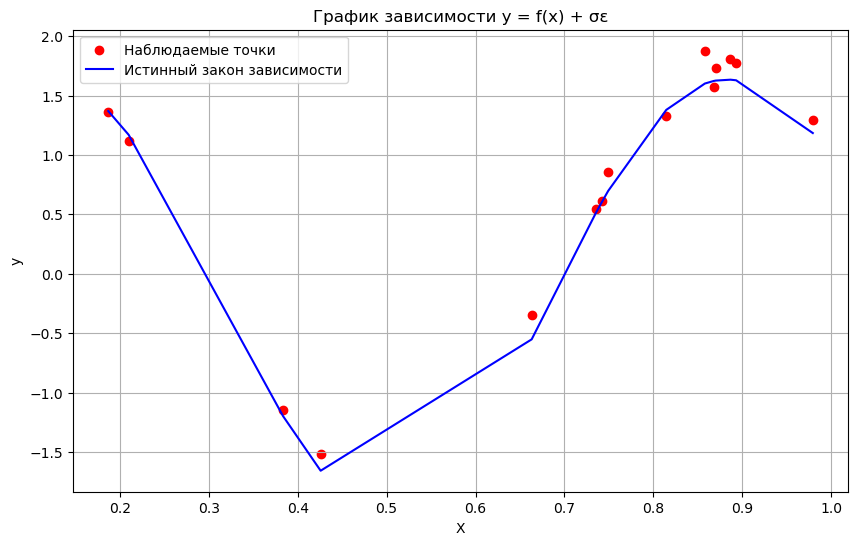

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(3 * np.pi * x) + np.cos(2 * np.pi * x)

np.random.seed(27)
N = 15
X = np.random.sample(N)
X.sort()

epsilon = np.random.normal(1, 1, N)

sigma = 0.1
y = f(X) + sigma * epsilon

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Наблюдаемые точки')
plt.plot(X, f(X), color='blue', label='Истинный закон зависимости')
plt.xlabel('X')
plt.ylabel('y')
plt.title('График зависимости y = f(x) + σε')
plt.legend()
plt.grid(True)
plt.show()

# 2. Метод наименьших квадратов

Постройте МНК решение для следующих регрессионных функций:
* $a_1(x, \omega) = \omega x$
* $a_2(x, \omega) = \omega \sin(x)$
* $a_3(x, \omega) = \omega_1 \ln(x) +\omega_2 e^{x}$

Покажите решения на графике.

Сравните решения используя метрику MSE (средний квадрат ошибки)

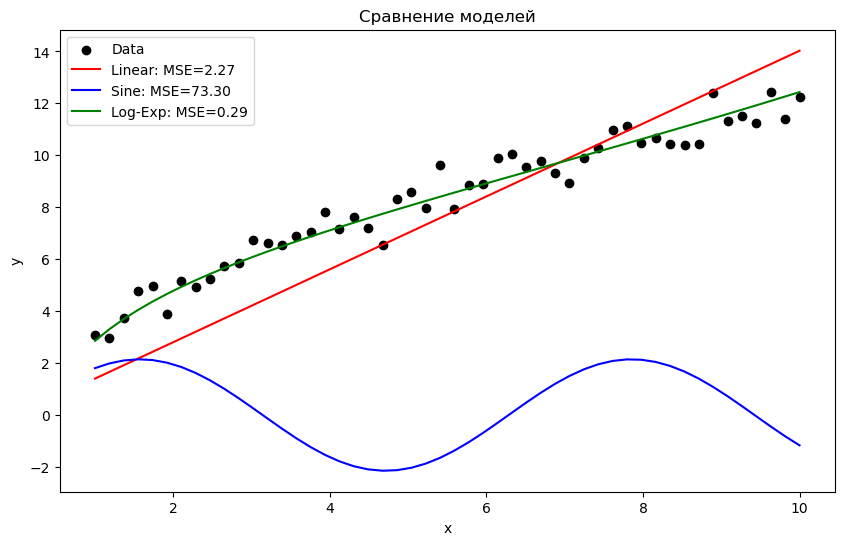

МНК для a1: 2.2701
МНК для a2: 73.2987
МНК для а3: 0.2893


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error


np.random.seed(0)
x = np.linspace(1, 10, 50)  
y = 3 * np.log(x) + 2 * np.exp(x/10) + np.random.normal(0, 0.5, size=len(x)) 


def func1(x, omega):
    return omega * x

def func2(x, omega):
    return omega * np.sin(x)

def func3(x, omega1, omega2):
    return omega1 * np.log(x) + omega2 * np.exp(x / 10)

params1, _ = curve_fit(func1, x, y)
params2, _ = curve_fit(func2, x, y)
params3, _ = curve_fit(func3, x, y)


y_pred1 = func1(x, *params1)
y_pred2 = func2(x, *params2)
y_pred3 = func3(x, *params3)


mse1 = mean_squared_error(y, y_pred1)
mse2 = mean_squared_error(y, y_pred2)
mse3 = mean_squared_error(y, y_pred3)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='black')
plt.plot(x, y_pred1, label=f'Linear: MSE={mse1:.2f}', color='red')
plt.plot(x, y_pred2, label=f'Sine: MSE={mse2:.2f}', color='blue')
plt.plot(x, y_pred3, label=f'Log-Exp: MSE={mse3:.2f}', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение моделей')
plt.show()


print(f"МНК для a1: {mse1:.4f}")
print(f"МНК для a2: {mse2:.4f}")
print(f"МНК для а3: {mse3:.4f}")

# 3. Переобучение. Подбор гиперпараметра

Используя семейтва полиномиальных моделей $A_{d} = \{a(x, \omega) = \sum_{i=0}^{d} \omega_{i} x^{i}\}$ с гиперпараметром $d$ (максимальная степень полинома) который отражает "сложность" модели, построить решения для $d = \{1, 2, 5, 10\}$.

С помощью метода отложенной выборки подобрать наилучшее значение $d$ в диапазоне от 1 до 10.

Показать на графике зависимость ошибки MSE на тренировочных и тестовых данных от $d$.

Degree 1: Train MSE = 0.2863, Test MSE = 0.2447


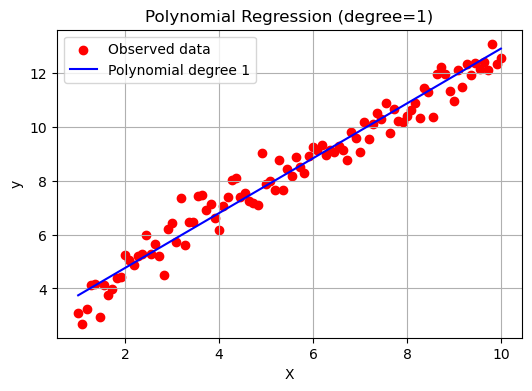

Degree 2: Train MSE = 0.2627, Test MSE = 0.2260


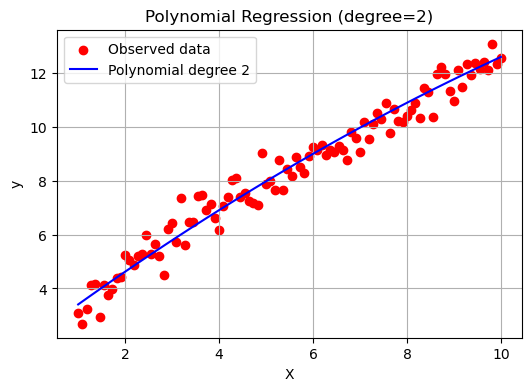

Degree 3: Train MSE = 0.2234, Test MSE = 0.2125


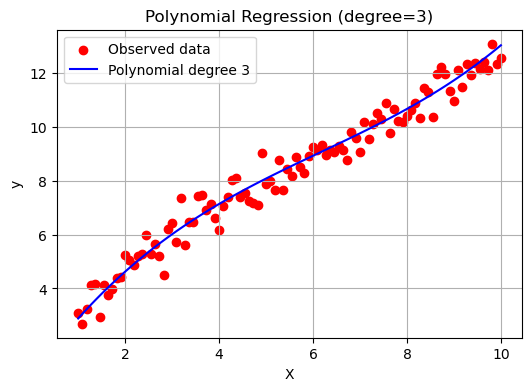

Degree 4: Train MSE = 0.2148, Test MSE = 0.2304


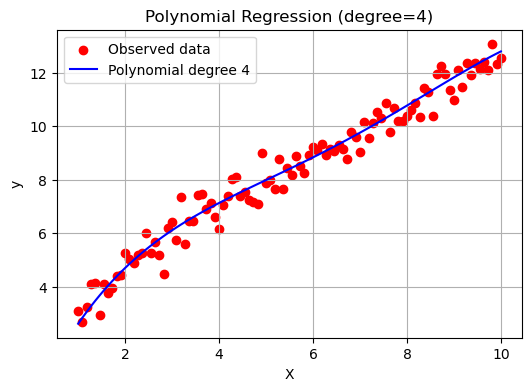

Degree 5: Train MSE = 0.2044, Test MSE = 0.2726


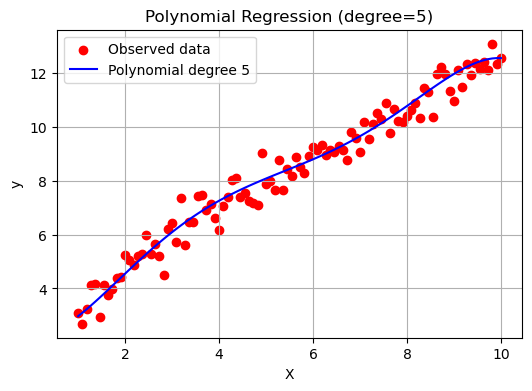

Degree 6: Train MSE = 0.2036, Test MSE = 0.2754


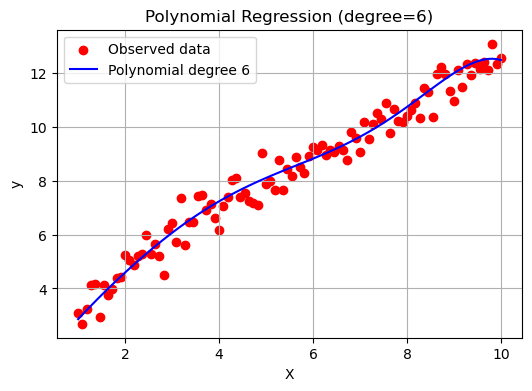

Degree 7: Train MSE = 0.2015, Test MSE = 0.2955


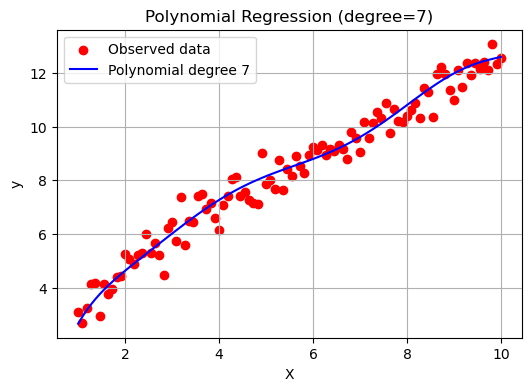

Degree 8: Train MSE = 0.2014, Test MSE = 0.2956


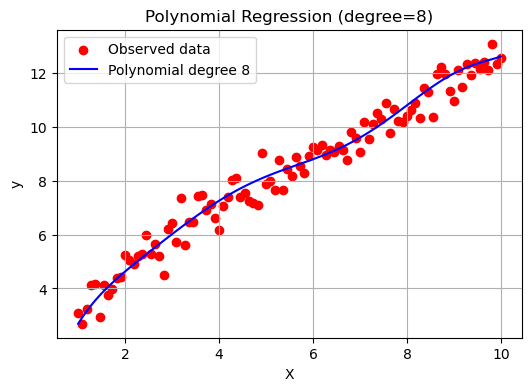

Degree 9: Train MSE = 0.2013, Test MSE = 0.2964


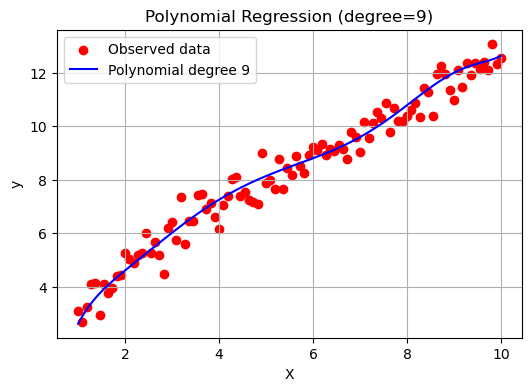

Degree 10: Train MSE = 0.2009, Test MSE = 0.2954


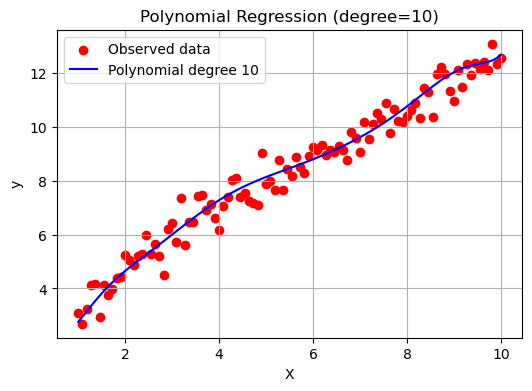

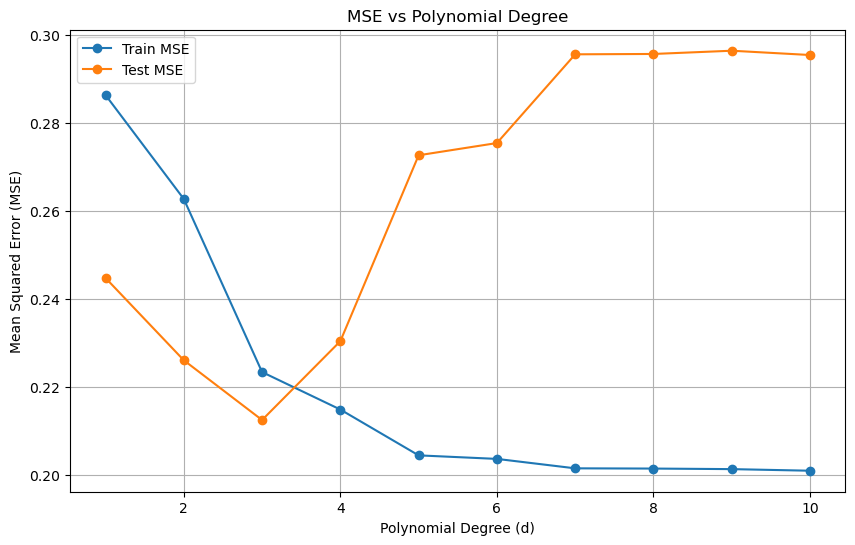

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = np.linspace(1, 10, 100).reshape(-1, 1) 
y = (3 * np.log(X.ravel()) + 2 * np.exp(X.ravel() / 10) + np.random.normal(0, 0.5, size=X.shape[0])).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def polynomial_regression(degree, X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return mse_train, mse_test, model, poly

max_degree = 10
train_errors = []
test_errors = []

for d in range(1, max_degree + 1):
    mse_train, mse_test, model, poly = polynomial_regression(d, X_train, y_train, X_test, y_test)
    train_errors.append(mse_train)
    test_errors.append(mse_test)
    print(f"Degree {d}: Train MSE = {mse_train:.4f}, Test MSE = {mse_test:.4f}")
    

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='red', label='Observed data')
    plt.plot(X, model.predict(poly.transform(X)), label=f'Polynomial degree {d}', color='blue')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (degree={d})')
    plt.legend()
    plt.grid(True)
    plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), train_errors, label='Train MSE', marker='o')
plt.plot(range(1, max_degree + 1), test_errors, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree (d)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


1


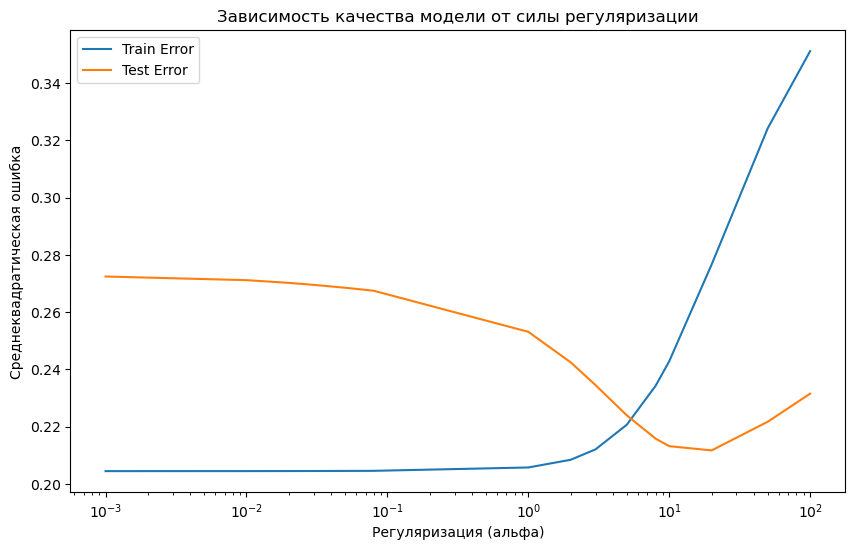

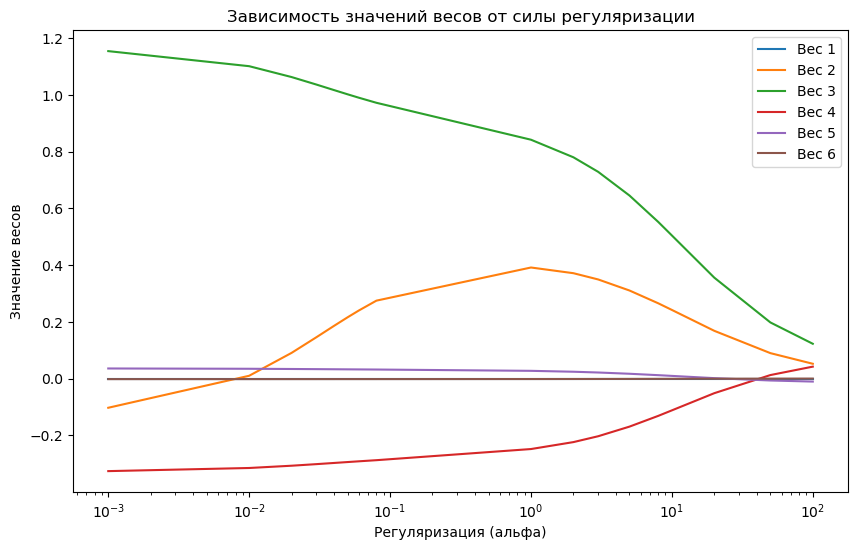

In [52]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

alphas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]
degree = 5

train_errors = []
test_errors = []
coefficients = []

for alpha in alphas:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    y_test_pred = model.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    coefficients.append(model.named_steps['ridge'].coef_)

coefficients = np.array(coefficients)
print(coefficients.shape[1])

plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Train Error')
plt.plot(alphas, test_errors, label='Test Error')
plt.xscale('log')
plt.xlabel('Регуляризация (альфа)')
plt.ylabel('Среднеквадратическая ошибка')
plt.title('Зависимость качества модели от силы регуляризации')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
labels = ['Вес 1', 'Вес 2', 'Вес 3', 'Вес 4', 'Вес 5', 'Вес 6']
plt.plot(alphas, coefficients[:, 0], label=labels)
plt.xscale('log')
plt.xlabel('Регуляризация (альфа)')
plt.ylabel('Значение весов')
plt.title('Зависимость значений весов от силы регуляризации')
plt.legend()
plt.show()